In [20]:
# 任务：基于examdata.cv数据，建立逻回归模型 
# 预测EXam1 = 75; Exam2 = 60时，该同学在EXam3是 pased or failed;
# 建立二阶边界，提高模型准确度


# 加载数据examdata.csv

import pandas as pd
import numpy as np
data = pd.read_csv("examdata.csv")

# 查看数据

data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


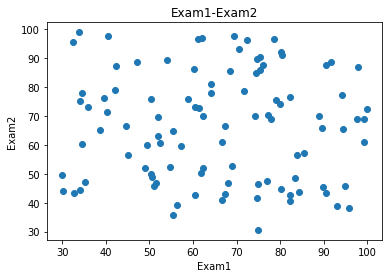

In [21]:
# 将散点数据可视化

%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()  
plt.scatter(data.loc[:,'Exam1'],data.loc[:,"Exam2"])  # 画出散点出，分别索引'Exam1'列数据，和'Exam1'列数据
plt.title("Exam1-Exam2") 
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.show()

In [22]:
#add lable mask 给散点数据加上不同类别的标记

#取通过的passed

mask = data.loc[:,'Pass']==1
print(mask)

0     False
1     False
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14    False
15     True
16     True
17    False
18     True
19     True
20    False
21     True
22    False
23    False
24     True
25     True
26     True
27    False
28    False
29    False
      ...  
70    False
71     True
72     True
73     True
74     True
75     True
76     True
77     True
78    False
79    False
80     True
81     True
82     True
83     True
84     True
85     True
86    False
87     True
88     True
89    False
90     True
91     True
92    False
93     True
94     True
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


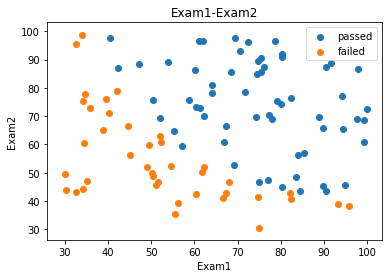

In [23]:
#区分可视化不同类别的点
from matplotlib import pyplot as plt
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,"Exam2"][~mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [24]:
# 进行数据的赋值。去除数据集的pass列赋给X，pass赋给y

X = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [25]:
#数据大小维度
print(X.shape,y.shape)

(100, 2) (100,)


In [26]:
#建立并训练模型
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#预测结果
y_predict = LR.predict(X)
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
# 评估模型表现 (准确率)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)
#越接近1越好 

0.87


In [29]:
#预测
#exam1=70 exam2=65
y_test = LR.predict([[70,65]])
print('passed' if y_test==1 else 'failed')

passed


In [30]:
#评估模型表现2 
#直接画图看边界曲线
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0],LR.coef_[0][1]

X2_new = - (theta0 + theta1 * X1)/theta2
print(X2_new)


0     82.811031
1     88.186306
2     81.294299
3     51.132927
4     27.769806
5     69.847236
6     49.987627
7     32.737365
8     31.406183
9     21.076867
10     6.911934
11    32.751106
12    23.711571
13    39.752642
14    76.719709
15    58.831604
16    40.117580
17    41.509800
18    38.145220
19    30.315503
20    42.222250
21    14.577435
22    63.090557
23    83.321172
24    29.143875
25    48.544517
26    26.335253
27    10.316810
28    49.090860
29    77.652412
        ...    
70    85.166942
71    46.352853
72    36.056827
73    50.791733
74    52.795778
75     1.996043
76    67.144084
77    63.185532
78    50.794620
79    23.811210
80    15.522959
81     8.184872
82    42.287654
83    54.781628
84    26.116403
85    40.863239
86    73.575173
87    32.175964
88    28.262239
89    60.843233
90     9.102256
91    13.620886
92    56.958715
93    33.396799
94    14.367936
95    22.246449
96    73.344337
97     2.631676
98    57.134890
99    33.045796
Name: Exam1, Length: 100

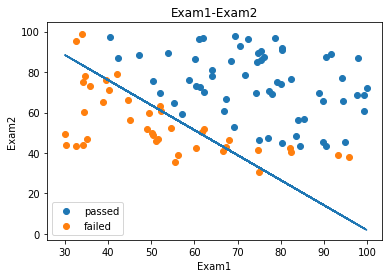

In [31]:
#绘图
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,"Exam2"][~mask])

plt.plot(X1,X2_new)  # 在原来代码基础上，加上画边界曲线的代码

plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()

# 用二阶边界函数

In [32]:
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2


In [33]:
#处理数据
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,"X1_X2":X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
5   45.083277  56.316372  2032.501908  3171.533730  2538.926616
6   61.106665  96.511426  3734.024451  9314.455325  5897.491326
7   75.024746  46.554014  5628.712448  2167.276177  3492.703021
8   76.098787  87.420570  5791.025337  7642.356010  6652.599288
9   84.432820  43.533393  7128.901086  1895.156333  3675.647160
10  95.861555  38.225278  9189.437740  1461.171883  3664.334598
11  75.013658  30.603263  5627.048945   936.559720  2295.662734
12  82.307053  76.481963  6774.451034  5849.490710  6295.005035
13  69.364589  97.718692  4811.446174  9548.942758  6778.216882
14  39.538339  76.036811  1563.280262  5

In [34]:
#训练新模型
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
#预测
y2_predict = LR2.predict(X_new)
accuracy2 = accuracy_score(y,y2_predict)
accuracy2

1.0

In [36]:
#要先对点排序 否则画图会点点连线错乱
X1_new = X1.sort_values()
X1_new

63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
39    34.183640
23    34.212061
53    34.524514
0     34.623660
61    35.286113
2     35.847409
29    38.785804
14    39.538339
34    40.236894
66    40.457551
86    42.075455
96    42.261701
64    44.668262
5     45.083277
76    47.264269
67    49.072563
55    49.586677
54    50.286496
77    50.458160
22    50.534788
44    51.047752
41    51.547720
33    52.045405
32    52.107980
89    52.348004
        ...    
24    77.924091
88    78.635424
4     79.032736
50    79.944818
26    80.190181
68    80.279574
84    80.366756
79    82.226662
12    82.307053
43    82.368754
95    83.489163
40    83.902394
9     84.432820
31    85.404519
80    88.913896
21    89.676776
94    89.845807
91    90.448551
52    90.546714
49    91.564975
27    93.114389
90    94.094331
42    94.443368
81    94.834507
10    95.861555
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100

In [37]:
#绘图
theta0 = LR2.intercept_
theta1= LR2.coef_[0][0]
theta2= LR2.coef_[0][1]
theta3= LR2.coef_[0][2]
theta4= LR2.coef_[0][3]
theta5= LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4)
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new * X1_new
X2_new_boundary = (-b + np.sqrt(b*b-4*a*c))/(2*a)
X2_new_boundary

[-0.02046427] -0.5623313061208446 -0.6465372139730652 0.0005109617656568389 0.0013314606649980952


63    140.716864
1     139.106955
57    124.212217
70    123.343057
36    116.563412
39    115.120505
23    114.969280
53    113.328176
0     112.815582
61    109.489573
2     106.802904
29     94.541797
14     91.841698
34     89.478118
66     88.758783
86     83.856144
96     83.331311
64     77.196201
5      76.248746
76     71.726703
67     68.485457
55     67.636893
54     66.529063
77     66.265289
22     66.148529
44     65.382221
41     64.660124
33     63.964559
32     63.878693
89     63.552544
         ...    
24     44.918493
88     44.643641
4      44.493113
50     44.155363
26     44.066308
68     44.034048
84     44.002682
79     43.355049
12     43.327950
43     43.307201
95     42.937588
40     42.804606
9      42.636455
31     42.335601
80     41.320367
21     41.113248
94     41.067967
91     40.908263
52     40.882511
49     40.619512
27     40.233225
90     39.997123
42     39.914501
81     39.822807
10     39.586432
56     39.190274
47     39.162968
51     38.8440

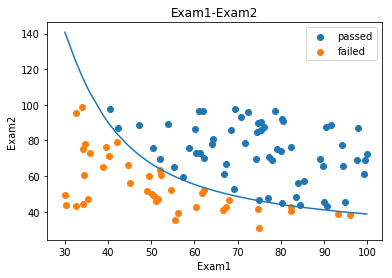

In [38]:
#绘图
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,"Exam2"][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,"Exam2"][~mask])

plt.plot(X1_new,X2_new_boundary)

plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed,failed),('passed','failed'))
plt.show()
